In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [2]:
df=pd.read_csv(r"C:\Users\wwwja\Desktop\New folder\Project\muscleblaze_review.csv")

data=df.copy()

In [3]:
data.head()

,Review,Rating,Title,Text,Buyer_tag
0,1,5,Brilliant,It's very very good protein👌👌👌 Test is so good...,Brilliant
1,2,5,Brilliant,Good protein rich chocolate 😋READ MORE,Brilliant
2,3,5,Mind-blowing purchase,Really effective and healthy productREAD MORE,Mind-blowing purchase
3,4,4,Wonderful,Its work good on me....also nice taste mixed w...,Wonderful
4,5,4,Good choice,"My first day of having this protein powder, pr...",Good choice


#Data Cleaning
#EDA
#Text Preprocessing
#Model Building
#Evaluation
#Improvement

In [4]:
data.drop(columns=["Review", "Buyer_tag"], inplace=True)
data.head()

,Rating,Title,Text
0,5,Brilliant,It's very very good protein👌👌👌 Test is so good...
1,5,Brilliant,Good protein rich chocolate 😋READ MORE
2,5,Mind-blowing purchase,Really effective and healthy productREAD MORE
3,4,Wonderful,Its work good on me....also nice taste mixed w...
4,4,Good choice,"My first day of having this protein powder, pr..."


In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  1470 non-null   int64 
 1   Title   1470 non-null   object
 2   Text    1470 non-null   object
dtypes: int64(1), object(2)
memory usage: 34.6+ KB


In [9]:
data.rename(columns={"Rating": "Target"}, inplace=True)

In [10]:
data["Target"] = data["Target"].apply(
    lambda x: "Positive" if x > 3 else ("Neutral" if x == 3 else "Negative")
)


In [18]:
from sklearn.preprocessing import LabelEncoder

lbl=LabelEncoder()
data["Target"]=lbl.fit_transform(data["Target"])



In [20]:
data.isnull().sum()

Target    0
Title     0
Text      0
dtype: int64

In [21]:
data.duplicated().sum()

143

In [22]:
data=data.drop_duplicates(keep="first")

In [23]:
data.duplicated().sum()

0

In [25]:
data.shape

(1327, 3)

2. EDA

In [26]:
data["Target"].value_counts()

Target
2    1154
0     102
1      71
Name: count, dtype: int64

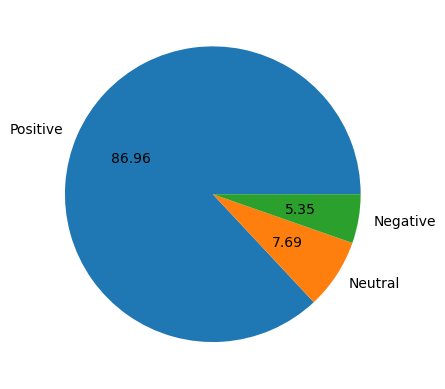

In [32]:
import matplotlib.pyplot as plt
plt.pie(data["Target"].value_counts(), labels=["Positive", "Neutral", "Negative"], autopct="%0.2f")
plt.show()

In [33]:
import nltk

In [93]:
data["Text"] = data["Title"] + " " + data["Text"]
data.drop(columns="Title", inplace=True)


In [95]:
data["Num_chars"]=data["Text"].apply(len)
data.head()

,Target,Text,Num_chars,Num_words,Num_sent,Transform_Text
0,2,Brilliant It's very very good protein👌👌👌 Test ...,125,20,1,good test good thing protein genuin flipkart
1,2,Brilliant Good protein rich chocolate 😋READ MORE,48,6,1,good protein rich chocol
2,2,Mind-blowing purchase Really effective and hea...,67,6,1,realli effect healthi productread
3,2,Wonderful Its work good on me....also nice tas...,90,20,2,work good also nice tast mix well water milk read
4,2,Good choice My first day of having this protei...,329,61,3,first day protein powder previous muscleblaz b...


In [96]:
data["Num_words"]=data["Text"].apply( lambda x: len(nltk.word_tokenize(x)))
data.head()

,Target,Text,Num_chars,Num_words,Num_sent,Transform_Text
0,2,Brilliant It's very very good protein👌👌👌 Test ...,125,21,1,good test good thing protein genuin flipkart
1,2,Brilliant Good protein rich chocolate 😋READ MORE,48,7,1,good protein rich chocol
2,2,Mind-blowing purchase Really effective and hea...,67,8,1,realli effect healthi productread
3,2,Wonderful Its work good on me....also nice tas...,90,21,2,work good also nice tast mix well water milk read
4,2,Good choice My first day of having this protei...,329,63,3,first day protein powder previous muscleblaz b...


In [97]:
data["Num_sent"]=data["Text"].apply( lambda x: len(nltk.sent_tokenize(x)))
data.head()

,Target,Text,Num_chars,Num_words,Num_sent,Transform_Text
0,2,Brilliant It's very very good protein👌👌👌 Test ...,125,21,1,good test good thing protein genuin flipkart
1,2,Brilliant Good protein rich chocolate 😋READ MORE,48,7,1,good protein rich chocol
2,2,Mind-blowing purchase Really effective and hea...,67,8,1,realli effect healthi productread
3,2,Wonderful Its work good on me....also nice tas...,90,21,2,work good also nice tast mix well water milk read
4,2,Good choice My first day of having this protei...,329,63,3,first day protein powder previous muscleblaz b...


In [98]:
data[["Num_words", "Num_chars", "Num_sent"]].describe()

,Num_words,Num_chars,Num_sent
count,1327.000000,1327.000000,1327.000000
mean,12.412208,69.895252,1.455916
std,14.046989,69.879645,0.892051
min,3.000000,18.000000,1.000000
25%,5.000000,33.000000,1.000000
50%,7.000000,45.000000,1.000000
75%,13.000000,74.000000,2.000000
max,108.000000,529.000000,9.000000


In [99]:
data[data["Target"]==0][["Num_words", "Num_chars", "Num_sent"]].describe()

,Num_words,Num_chars,Num_sent
count,102.000000,102.000000,102.000000
mean,18.617647,101.794118,1.558824
std,19.351386,94.954323,1.113140
min,4.000000,28.000000,1.000000
25%,7.000000,44.250000,1.000000
50%,10.000000,63.500000,1.000000
75%,19.750000,107.750000,2.000000
max,100.000000,497.000000,7.000000


In [100]:
data[data["Target"]==1][["Num_words", "Num_chars", "Num_sent"]].describe()

,Num_words,Num_chars,Num_sent
count,71.000000,71.000000,71.000000
mean,13.197183,68.732394,1.225352
std,14.716968,69.129476,0.778225
min,3.000000,18.000000,1.000000
25%,5.000000,27.000000,1.000000
50%,8.000000,44.000000,1.000000
75%,16.000000,85.500000,1.000000
max,104.000000,489.000000,7.000000


In [101]:
data[data["Target"]==2][["Num_words", "Num_chars", "Num_sent"]].describe()

,Num_words,Num_chars,Num_sent
count,1154.000000,1154.000000,1154.000000
mean,11.815425,67.147314,1.461005
std,13.310544,66.620223,0.874990
min,3.000000,20.000000,1.000000
25%,5.000000,33.000000,1.000000
50%,7.000000,43.000000,1.000000
75%,13.000000,70.000000,2.000000
max,108.000000,529.000000,9.000000


<Axes: xlabel='Num_chars', ylabel='Count'>

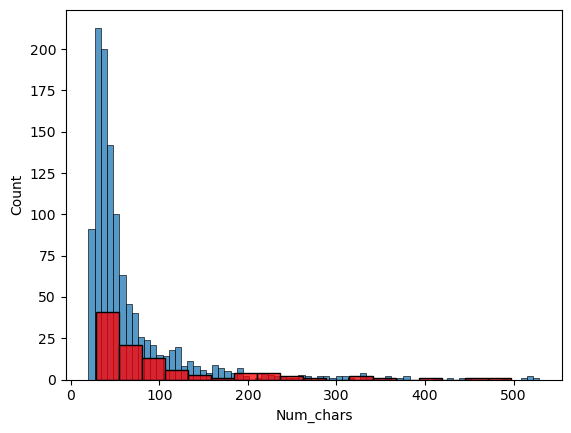

In [102]:
import seaborn as sns
sns.histplot(data[data["Target"]==2]["Num_chars"])
sns.histplot(data[data["Target"]==0]["Num_chars"], color="red")


<Axes: xlabel='Num_chars', ylabel='Count'>

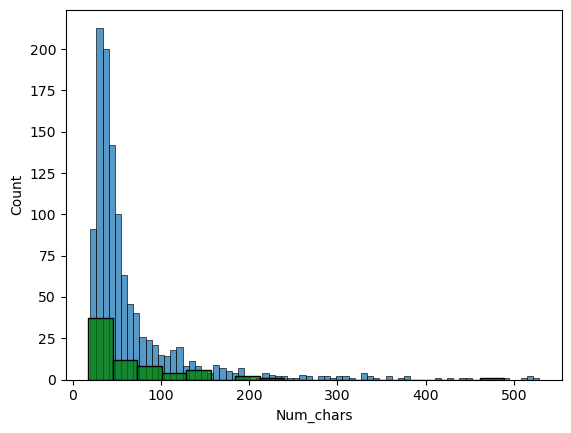

In [103]:
sns.histplot(data[data["Target"]==2]["Num_chars"])

sns.histplot(data[data["Target"]==1]["Num_chars"], color="green")


<Axes: xlabel='Num_words', ylabel='Count'>

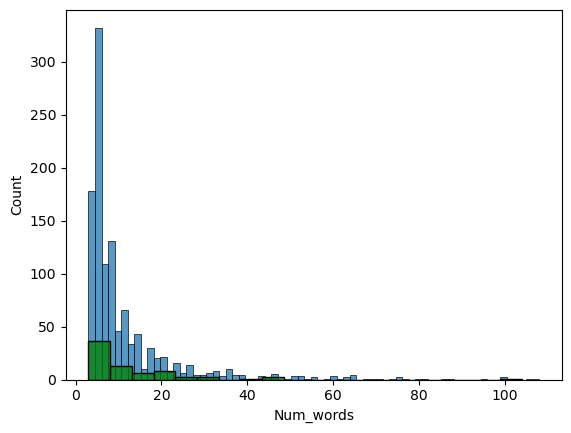

In [104]:
sns.histplot(data[data["Target"]==2]["Num_words"])
sns.histplot(data[data["Target"]==1]["Num_words"], color="green")


<Axes: xlabel='Num_words', ylabel='Count'>

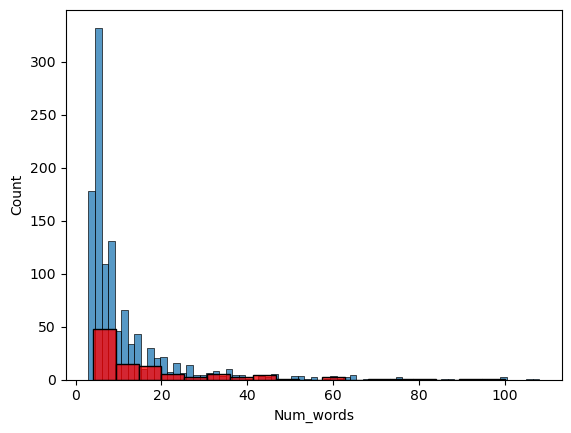

In [105]:
sns.histplot(data[data["Target"]==2]["Num_words"])
sns.histplot(data[data["Target"]==0]["Num_words"], color="red")


<Axes: xlabel='Num_sent', ylabel='Count'>

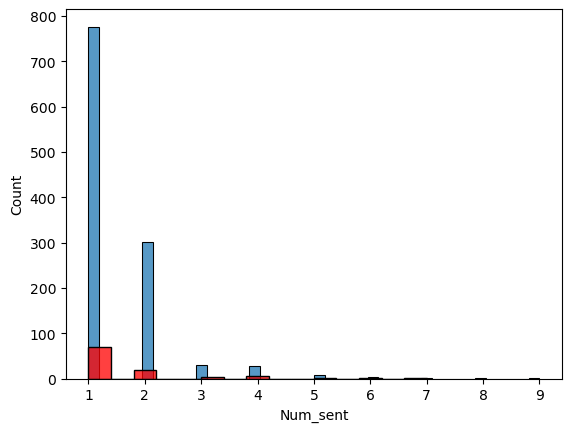

In [106]:
sns.histplot(data[data["Target"]==2]["Num_sent"])
sns.histplot(data[data["Target"]==0]["Num_sent"], color="red")


<Axes: xlabel='Num_sent', ylabel='Count'>

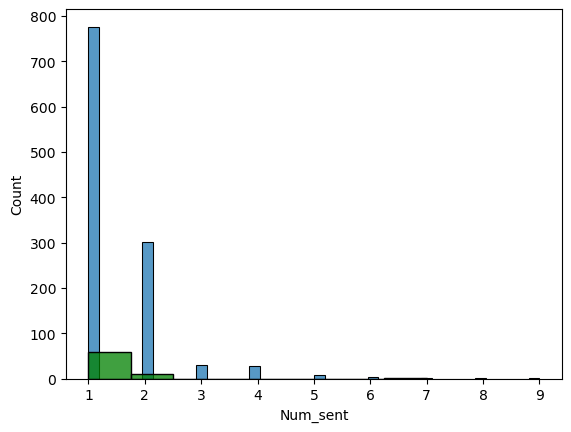

In [107]:
sns.histplot(data[data["Target"]==2]["Num_sent"])
sns.histplot(data[data["Target"]==1]["Num_sent"], color="green")


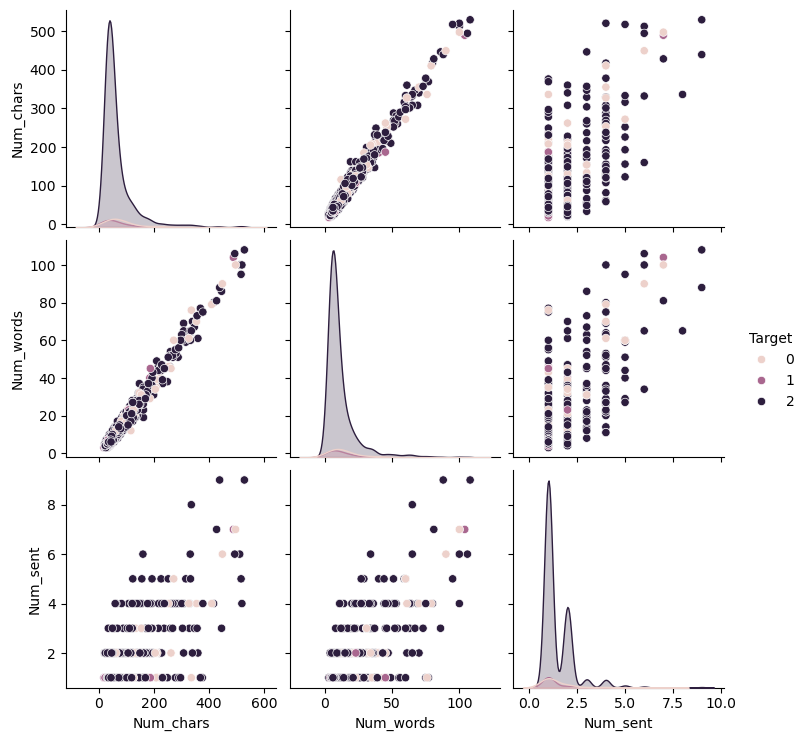

In [108]:
sns.pairplot(data, hue="Target")

<Axes: >

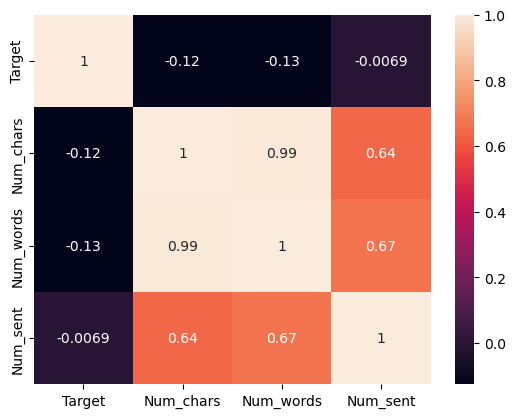

In [112]:
sns.heatmap(data[["Target", "Num_chars", "Num_words", "Num_sent"]].corr(), annot=True)

In [113]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    text=y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [114]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string
nltk.download('stopwords')


ps=PorterStemmer()
ps.stem("Loving")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wwwja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'love'

In [115]:
data["Transform_Text"]=data["Text"].apply(transform_text)

In [116]:
data.head()

,Target,Text,Num_chars,Num_words,Num_sent,Transform_Text
0,2,Brilliant It's very very good protein👌👌👌 Test ...,125,21,1,brilliant good test good thing protein genuin ...
1,2,Brilliant Good protein rich chocolate 😋READ MORE,48,7,1,brilliant good protein rich chocol
2,2,Mind-blowing purchase Really effective and hea...,67,8,1,purchas realli effect healthi productread
3,2,Wonderful Its work good on me....also nice tas...,90,21,2,wonder work good also nice tast mix well water...
4,2,Good choice My first day of having this protei...,329,63,3,good choic first day protein powder previous m...


In [117]:
from wordcloud import WordCloud

wc= WordCloud(width=500, height=500, min_font_size=10, background_color="white")


In [118]:
neutral_wc=wc.generate(data[data["Target"]==1]["Transform_Text"].str.cat(sep=" "))

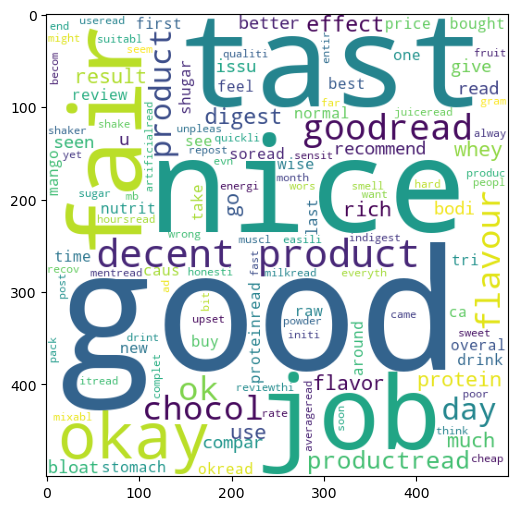

In [119]:
plt.figure(figsize=(15, 6))
plt.imshow(neutral_wc)

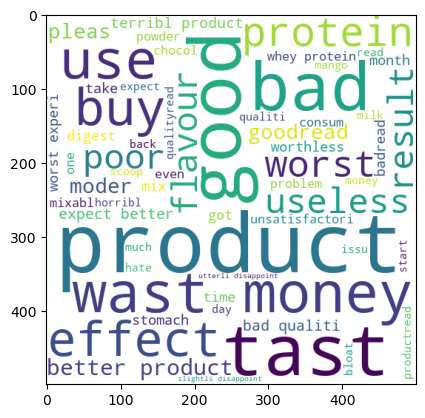

In [120]:
neg_wc=wc.generate(data[data["Target"]==0]["Transform_Text"].str.cat(sep=" "))
plt.imshow(neutral_wc)

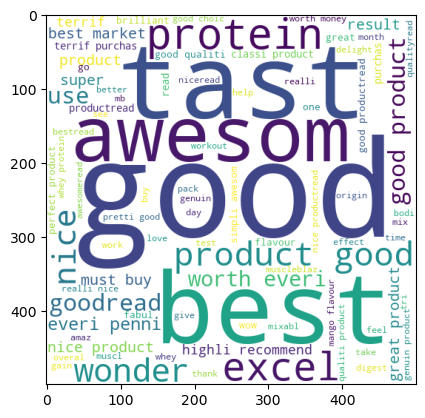

In [122]:
post_wc=wc.generate(data[data["Target"]==2]["Transform_Text"].str.cat(sep=" "))

plt.imshow(post_wc)

C:\Users\wwwja\AppData\Local\Temp\ipykernel_2996\1186851275.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word", y="Frequency", data=neg_df, palette="Reds_r")


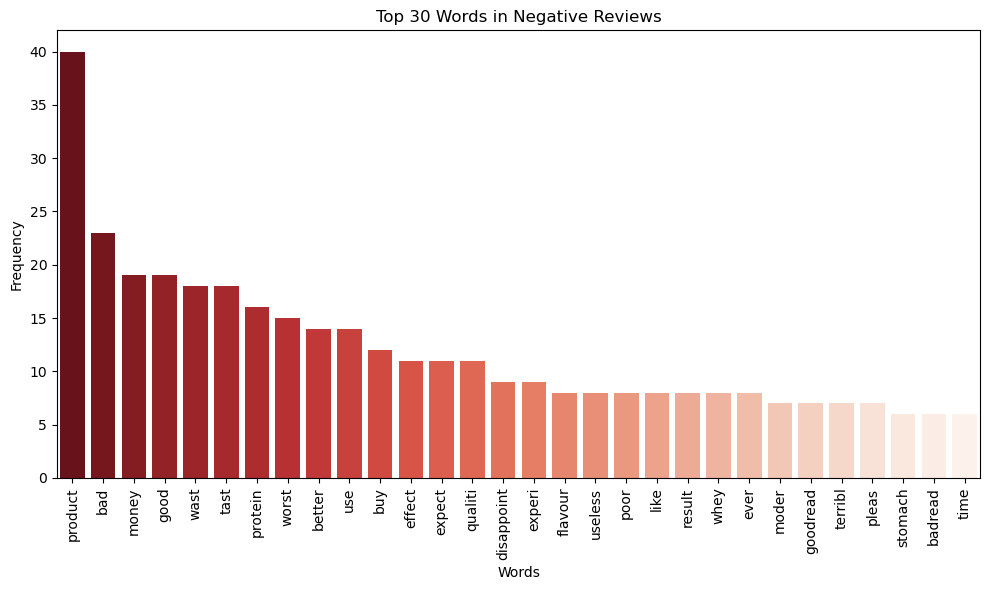

In [123]:
neg_words=[]
for msg in data[data["Target"]==0]["Transform_Text"].tolist():
    for word in msg.split():
        neg_words.append(word)

len(neg_words)

from collections import Counter
# Get top 30 most common words
neg_counts = Counter(neg_words).most_common(30)
neg_df = pd.DataFrame(neg_counts, columns=["Word", "Frequency"])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Frequency", data=neg_df, palette="Reds_r")
plt.xticks(rotation=90)
plt.title("Top 30 Words in Negative Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\wwwja\AppData\Local\Temp\ipykernel_2996\4034937726.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word", y="Frequency", data=neu_df, palette="Greens_r")


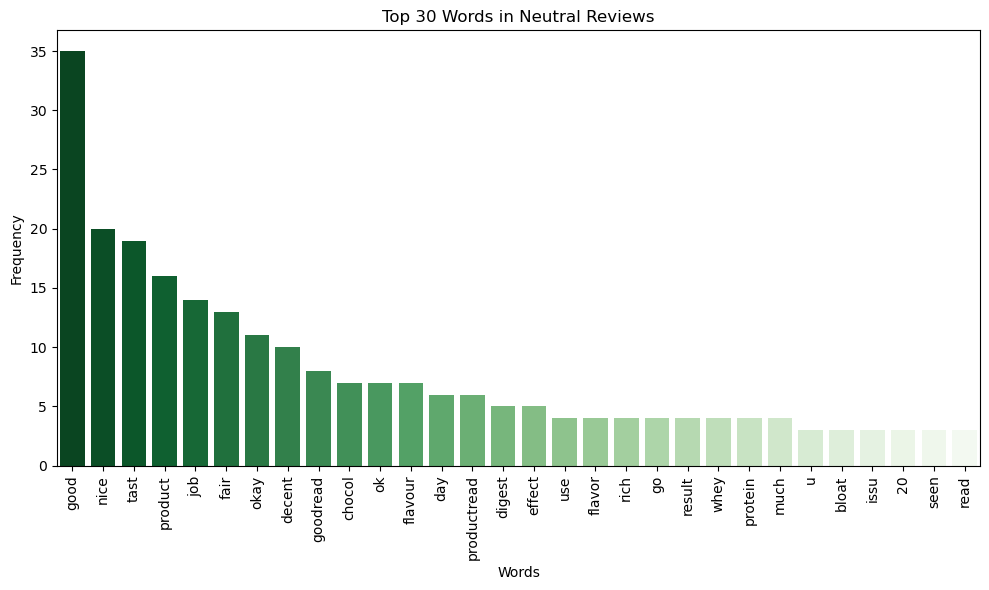

In [124]:
neu_words=[]
for msg in data[data["Target"]==1]["Transform_Text"].tolist():
    for word in msg.split():
        neu_words.append(word)

len(neu_words)

from collections import Counter
# Get top 30 most common words
neu_counts = Counter(neu_words).most_common(30)
neu_df = pd.DataFrame(neu_counts, columns=["Word", "Frequency"])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Frequency", data=neu_df, palette="Greens_r")
plt.xticks(rotation=90)
plt.title("Top 30 Words in Neutral Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


C:\Users\wwwja\AppData\Local\Temp\ipykernel_2996\1191144426.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Word", y="Frequency", data=pos_df, palette="Blues_r")


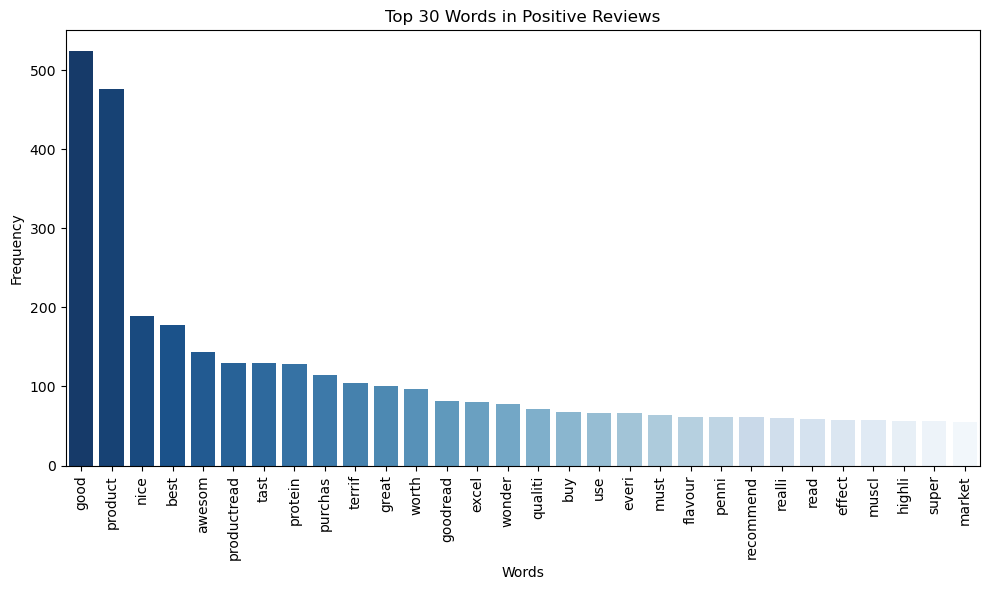

In [125]:
pos_words=[]
for msg in data[data["Target"]==2]["Transform_Text"].tolist():
    for word in msg.split():
        pos_words.append(word)

len(pos_words)

from collections import Counter
# Get top 30 most common words
pos_counts = Counter(pos_words).most_common(30)
pos_df = pd.DataFrame(pos_counts, columns=["Word", "Frequency"])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Word", y="Frequency", data=pos_df, palette="Blues_r")
plt.xticks(rotation=90)
plt.title("Top 30 Words in Positive Reviews")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [126]:
data.head()

,Target,Text,Num_chars,Num_words,Num_sent,Transform_Text
0,2,Brilliant It's very very good protein👌👌👌 Test ...,125,21,1,brilliant good test good thing protein genuin ...
1,2,Brilliant Good protein rich chocolate 😋READ MORE,48,7,1,brilliant good protein rich chocol
2,2,Mind-blowing purchase Really effective and hea...,67,8,1,purchas realli effect healthi productread
3,2,Wonderful Its work good on me....also nice tas...,90,21,2,wonder work good also nice tast mix well water...
4,2,Good choice My first day of having this protei...,329,63,3,good choic first day protein powder previous m...


In [172]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer
tfid=TfidfVectorizer(max_features=3000)

In [173]:
x_dense=tfid.fit_transform(data["Transform_Text"])

In [174]:
x=x_dense.toarray()

In [175]:
y=data["Target"].values

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, r2_score
gnb=GaussianNB()
mb=MultinomialNB()
bnb=BernoulliNB()
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.3, random_state=2)


gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1, average=None))





0.8220551378446115
[[ 17   2  13]
 [  4   8   9]
 [ 21  22 303]]
[0.4047619  0.25       0.93230769]


In [161]:

mb.fit(x_train, y_train)
y_pred2=mb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(precision_score(y_test, y_pred2, average=None))
print(confusion_matrix(y_test, y_pred2))




0.8671679197994987
[0.         0.         0.86716792]
[[  0   0  32]
 [  0   0  21]
 [  0   0 346]]


C:\Users\wwwja\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [156]:

bnb.fit(x_train, y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(precision_score(y_test, y_pred3, average=None))
print(confusion_matrix(y_test, y_pred3))




0.8596491228070176
[0.57142857 0.         0.88390501]
[[  8   0  24]
 [  1   0  20]
 [  5   6 335]]


In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [183]:
lr=LogisticRegression(solver='liblinear', penalty='l1')
svc=SVC(kernel='sigmoid', gamma=1.0)
Gb=GaussianNB()
Mb=MultinomialNB()
Bnb=BernoulliNB()
dtc=DecisionTreeClassifier(max_depth=5)
Knc=KNeighborsClassifier()
rfc=RandomForestClassifier(n_estimators=50, random_state=2)
abc=AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')
bc=BaggingClassifier(n_estimators=50, random_state=2)
ec=ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc=GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb=XGBClassifier(n_estimators=50, random_state=2)

In [207]:
def pred_transf(clf, X_train, X_test, Y_train, Y_test):
    clf.fit(X_train, Y_train)
    y_pred=clf.predict(X_test)
    acc=accuracy_score(Y_test, y_pred)
    pre=precision_score(Y_test, y_pred, average='macro', zero_division=0)
    print(acc)
    print(pre)

    return acc, pre
    

In [208]:
clfs={"LR":lr, "SVC":svc, "GB":Gb, "MB":Mb, "BNB":Bnb, "DTC":dtc, "KNC":Knc, "RFC":rfc, "ABC":abc, "BC":bc, "ETC":ec, "GBC":gbc, "XGB":xgb }
asc=[]
psc=[]
for name, clf in clfs.items():
    acc_scr, prs_scr=pred_transf(clf, x_train, x_test, y_train, y_test )
    asc.append(acc_scr)
    psc.append(prs_scr)
    


0.9298245614035088
0.9480286738351253
0.9373433583959899
0.9004486949150982
0.8220551378446115
0.5290231990231989
0.8671679197994987
0.28905597326649957
0.8596491228070176
0.48511119487372784
0.9072681704260651
0.9136616827909704
0.9323308270676691
0.8867578077387342
0.9398496240601504
0.9252136752136751
0.8847117794486216
0.9608843537414966
0.9473684210526315
0.8798355366698143
0.949874686716792
0.9337830687830687
0.9423558897243107
0.890299823633157
0.9473684210526315
0.9522497704315885


In [209]:
perf_df=pd.DataFrame({"Algorithms": clfs.keys(), "Accuracy": asc, "Precision":psc}).sort_values("Precision", ascending=False)

In [210]:
perf_df.head(15)

,Algorithms,Accuracy,Precision
8,ABC,0.884712,0.960884
12,XGB,0.947368,0.952250
0,LR,0.929825,0.948029
10,ETC,0.949875,0.933783
7,RFC,0.939850,0.925214
5,DTC,0.907268,0.913662
1,SVC,0.937343,0.900449
11,GBC,0.942356,0.890300
6,KNC,0.932331,0.886758
9,BC,0.947368,0.879836


In [217]:
perf_df1=pd.melt(perf_df, id_vars="Algorithms")
perf_df1

,Algorithms,variable,value
0,ABC,Accuracy,0.884712
1,XGB,Accuracy,0.947368
2,LR,Accuracy,0.929825
3,ETC,Accuracy,0.949875
4,RFC,Accuracy,0.939850
5,DTC,Accuracy,0.907268
6,SVC,Accuracy,0.937343
7,GBC,Accuracy,0.942356
8,KNC,Accuracy,0.932331
9,BC,Accuracy,0.947368


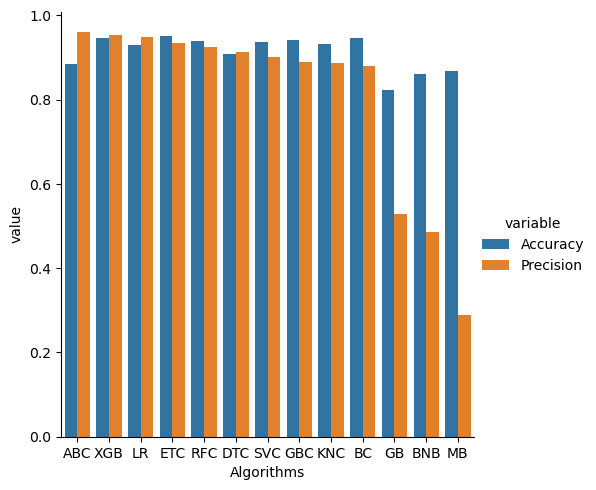

In [218]:
sns.catplot(x="Algorithms", y="value", hue="variable", data=perf_df1, kind="bar")